In [2]:
# Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 
import os

## Temperature - Collins

In [3]:
# Import CSV
file = 'Resources/avgtemp1901-2016.csv'
df_temp = pd.read_csv(file)
df_temp.head

# Display columns
df_temp.columns

#Renaming columns 
data_temp = df_temp.rename(columns={"Temperature - (Celsius)":"Mean Temperature(Celcius)"," Statistics":"Months"," Year":"Year"})

data_temp

# Removing the average on the Months
sliced_column = data_temp['Months'].str.slice(stop = 4)
sliced_column
data_temp["Months"] = sliced_column
data_temp["Months"]

# Delete Redundant Columns
del data_temp[' Country']
del data_temp[' ISO3']

# Filter to 10 year Dataset
data_temp
data_temp_1986 = data_temp.loc[data_temp['Year'] > 1985, :]

# Reset index
data_temp_1986_2016 = data_temp_1986.reset_index(drop=True)
data_temp_1986_2016

# Group data by year and display stats
group_data_temp = data_temp_1986_2016.groupby(data_temp_1986_2016['Year'])
stats_temp = group_data_temp.describe()
stats_temp

# Mean for each year
mean_temperature = group_data_temp.mean()

# Reset Index
new_mean_temperature = mean_temperature.reset_index()
new_mean_temperature

,Year,Mean Temperature(Celcius)
0,1986,21.683200
1,1987,21.710608
2,1988,22.216350
3,1989,21.471483
4,1990,21.967142
5,1991,22.145483
6,1992,21.576192
7,1993,21.824692
8,1994,21.759325
9,1995,21.651883


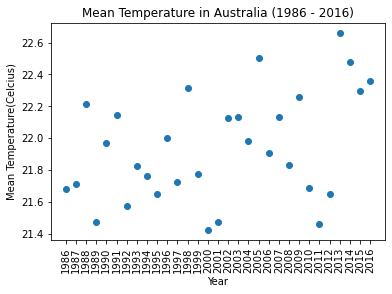

In [4]:
plt.scatter(new_mean_temperature['Year'],new_mean_temperature['Mean Temperature(Celcius)'])
plt.xlabel('Year')
plt.ylabel('Mean Temperature(Celcius)')
plt.title('Mean Temperature in Australia (1986 - 2016)')
plt.xticks(new_mean_temperature['Year'], rotation=90)
plt.savefig('Output/test.jpeg')

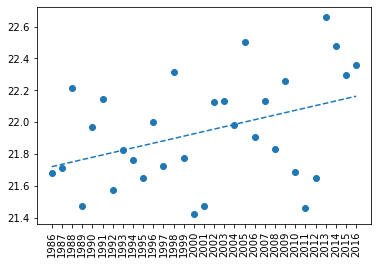

In [5]:
year = new_mean_temperature['Year']
m_temperature = new_mean_temperature['Mean Temperature(Celcius)']

# Perform a linear regression on year versus temperature
t_slope, t_int, t_r, t_p, t_std_err = sts.linregress(year, m_temperature)

# Create equation of line to calculate predicted violent crime rate
t_fit = t_slope * year + t_int

plt.scatter(year,m_temperature)
plt.plot(year,t_fit,"--")
plt.xticks(year, rotation=90)
plt.show()

In [16]:
years = [2017,2018,2019,2020]
temps=[]
for year in years:
    fit = round(t_slope * year + t_int,2)
    temps.append(fit)

# Create a DataFrame of frames using a dictionary of lists
new_temps = pd.DataFrame({'Year': years,
'Mean Temperature(Celcius)': temps})

# Append new dataframe to the previous Dataframe
mean_temp_1986_2020 = new_mean_temperature.append(new_temps, ignore_index=True)

Text(0.5, 1.0, 'Mean Temperature Vs Year')

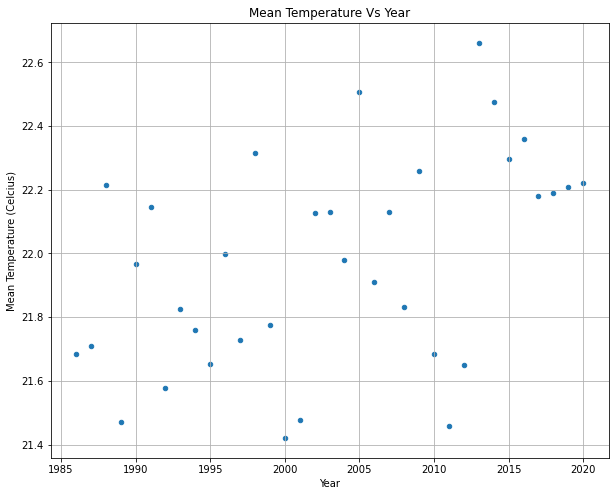

In [15]:
# Scatter graph for 1985 - 2020
mean_temp_1986_2020.plot(kind='scatter',x='Year',y='Mean Temperature(Celcius)',figsize = (10,8))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel("Mean Temperature (Celcius)")
plt.title("Mean Temperature Vs Year")

## Rainfall - Thierry

Text(0, 0.5, 'Total Rainfall (mm)')

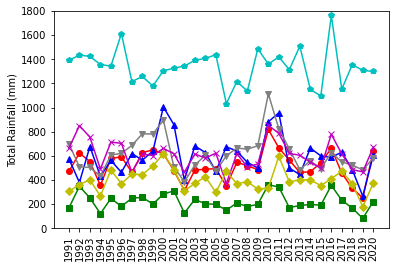

In [7]:
# Rainfall data - Australia States Yearly Average Rainfall
rf_nsw_act_file = os.path.join("Resources", "Rainfall_Total_1900_2020_NSW_ACT.csv")
rf_nt_file = os.path.join("Resources", "Rainfall_Total_1900_2020_NT.csv")
rf_qld_file = os.path.join("Resources", "Rainfall_Total_1900_2020_QLD.csv")
rf_sa_file = os.path.join("Resources", "Rainfall_Total_1900_2020_SA.csv")
rf_tas_file = os.path.join("Resources", "Rainfall_Total_1900_2020_TAS.csv")
rf_vic_file = os.path.join("Resources", "Rainfall_Total_1900_2020_VIC.csv")
rf_wa_file = os.path.join("Resources", "Rainfall_Total_1900_2020_WA.csv")

rf_nsw_act_data = pd.read_csv(rf_nsw_act_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_nt_data = pd.read_csv(rf_nt_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_qld_data = pd.read_csv(rf_qld_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_sa_data = pd.read_csv(rf_sa_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_tas_data = pd.read_csv(rf_tas_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_vic_data = pd.read_csv(rf_vic_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])
rf_wa_data = pd.read_csv(rf_wa_file, header=None, delim_whitespace=True, names=["Rainfall Total (mm)"])

rf_nsw_act_data["Year"] = rf_nsw_act_data.index.astype(str).str[:4]
rf_nsw_act_data = rf_nsw_act_data.set_index('Year')
rf_nt_data["Year"] = rf_nt_data.index.astype(str).str[:4]
rf_nt_data = rf_nt_data.set_index('Year')
rf_qld_data["Year"] = rf_qld_data.index.astype(str).str[:4]
rf_qld_data = rf_qld_data.set_index('Year')
rf_sa_data["Year"] = rf_sa_data.index.astype(str).str[:4]
rf_sa_data = rf_sa_data.set_index('Year')
rf_tas_data["Year"] = rf_tas_data.index.astype(str).str[:4]
rf_tas_data = rf_tas_data.set_index('Year')
rf_vic_data["Year"] = rf_vic_data.index.astype(str).str[:4]
rf_vic_data = rf_vic_data.set_index('Year')
rf_wa_data["Year"] = rf_wa_data.index.astype(str).str[:4]
rf_wa_data = rf_wa_data.set_index('Year')

rf_states_df = rf_nsw_act_data
rf_states_df = rf_states_df.rename(columns={"Rainfall Total (mm)":"NSW/ACT"})
rf_states_df["NT"] = rf_nt_data["Rainfall Total (mm)"]
rf_states_df["QLD"] = rf_qld_data["Rainfall Total (mm)"]
rf_states_df["SA"] = rf_sa_data["Rainfall Total (mm)"]
rf_states_df["TAS"] = rf_tas_data["Rainfall Total (mm)"]
rf_states_df["VIC"] = rf_vic_data["Rainfall Total (mm)"]
rf_states_df["WA"] = rf_wa_data["Rainfall Total (mm)"]

rf_states_df = rf_states_df.iloc[91:121,:]

year_states = rf_states_df.index

plt.plot(year_states, rf_states_df["NSW/ACT"], marker="o", color="r")
plt.plot(year_states, rf_states_df["NT"], marker="^", color="b")
plt.plot(year_states, rf_states_df["QLD"], marker="v", color="gray")
plt.plot(year_states, rf_states_df["SA"], marker="s", color="g")
plt.plot(year_states, rf_states_df["TAS"], marker="p", color="c")
plt.plot(year_states, rf_states_df["VIC"], marker="x", color="m")
plt.plot(year_states, rf_states_df["WA"], marker="D", color="y")
plt.xticks(year_states, rotation=90)
plt.ylim(0,1800)
plt.ylabel("Total Rainfall (mm)")

Text(0, 0.5, 'Total Rainfall (mm)')

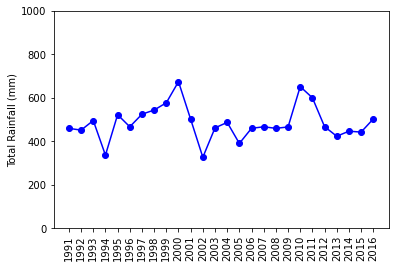

In [8]:
# Rainfall data - Australia Yearly Average Rainfall
rf_au_data = pd.read_csv(os.path.join("Resources","pr_1901_2016_AUS.csv"))

rf_au_gb = rf_au_data.groupby([" Year"]).sum()

rf_au_df = rf_au_gb.iloc[90:116,:]

year_au = rf_au_df.index
rf_au = rf_au_df["Rainfall - (MM)"]

plt.plot(year_au, rf_au, marker="o", color="blue")
plt.xticks(year_au, rotation=90)
plt.ylim(0,1000)
plt.ylabel("Total Rainfall (mm)")

## Emissions - Jim

In [9]:
# Save file path to variable
carbon_dioxide_csv = os.path.join("Resources", "CapeGrim_CO2_data_download.csv")
methane_csv = os.path.join("Resources","CapeGrim_CH4_data_download.csv")
nitrous_oxide_csv = os.path.join("Resources","CapeGrim_N2O_data_download.csv")

# Import emissions data
carbon_dioxide_df = pd.read_csv(carbon_dioxide_csv) 
methane_df = pd.read_csv(methane_csv)
nitrous_oxide_df = pd.read_csv(nitrous_oxide_csv) 

nitrous_oxide_df.head()

,YYYY,MM,DD,DATE,N2O(ppb),SD(ppb),Source
0,1978,4,26,1978.3178,299.19,0.23,Cape Grim air archive
1,1978,7,7,1978.5151,299.55,0.19,Cape Grim air archive
2,1980,9,3,1980.6749,301.66,0.07,Cape Grim air archive
3,1981,10,5,1981.7616,301.84,0.11,Cape Grim air archive
4,1984,5,23,1984.3934,302.98,0.11,Cape Grim air archive


In [10]:
# Calculate central tendencies for each year
# Methane
methane_gb = methane_df.groupby('YYYY')
emissions_df = methane_gb.agg(['mean','median'])
emissions_df = emissions_df.reset_index()
emissions_df = emissions_df[['YYYY', 'CH4(ppb)']]

# Carbon Dioxide
carbon_dioxide_gb = carbon_dioxide_df.groupby('YYYY')
cd_df = carbon_dioxide_gb.agg(['mean','median'])
cd_df = cd_df.reset_index()
cd_df = cd_df[['YYYY', 'CO2(ppm)']]
emissions_df = pd.merge(emissions_df, cd_df, how='outer', on='YYYY')

# Nitrous Oxide
nitrous_oxide_gb = nitrous_oxide_df.groupby('YYYY')
no_df = nitrous_oxide_gb.agg(['mean','median'])
no_df = no_df.reset_index()
no_df = no_df[['YYYY', 'N2O(ppb)']]
emissions_df = pd.merge(emissions_df, no_df, how='outer', on='YYYY')

# Clean up dataframe and sort by year - filter 1991 onwards
emissions_df = emissions_df.sort_values(by='YYYY', ascending=True)
emissions_df = emissions_df.loc[emissions_df['YYYY'] > 1990, :]
emissions_df = emissions_df.reset_index()
del emissions_df['index']
emissions_df.rename(columns = {'YYYY': 'Year'}, inplace = True)

emissions_df.head()

Year     CH4(ppb)              CO2(ppm)              N2O(ppb)          
                mean    median        mean    median        mean    median
0  1991  1674.079167  1678.190  352.691000  352.7570  308.670000  308.6700
1  1992  1687.101667  1688.000  354.173083  354.3655  309.294111  309.3160
2  1993  1688.873333  1690.740  354.921250  354.8900  309.255000  309.2540
3  1994  1694.108333  1697.095  356.364583  356.3470  309.914333  310.0640
4  1995  1700.219167  1701.975  358.399583  358.3705  310.465833  310.3665

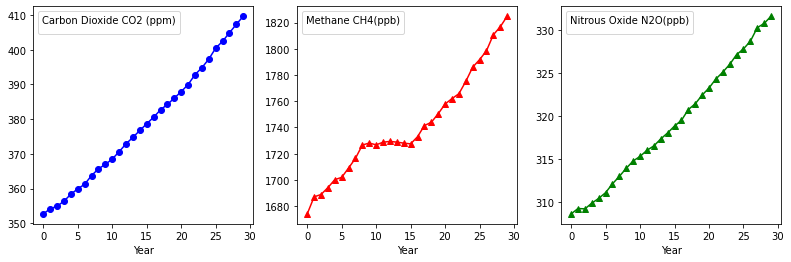

In [11]:
# methane_dioxide_df.plot()
x_axis = np.arange(0, 30, 1)

plt.figure(1,figsize=[13.4, 4.0])

plt.subplot(131)
plt.plot(x_axis, emissions_df['CO2(ppm)']['mean'], marker ='o', color='blue', label="Methane")
plt.legend(labels="", title = "Carbon Dioxide CO2 (ppm)")
plt.xlabel('Year')

plt.subplot(132)
plt.plot(x_axis, emissions_df['CH4(ppb)']['mean'], marker='^', color='red', label="Carbon Dioxide")
plt.xlabel('Year')
plt.legend(labels="", title = "Methane CH4(ppb)")

plt.subplot(133)
plt.plot(x_axis, emissions_df['N2O(ppb)']['mean'], marker='^', color='green', label="Nitrous Oxide")
plt.xlabel('Year')
plt.legend(labels="", title = "Nitrous Oxide N2O(ppb)")

plt.show()

## Deforestation - Spyro

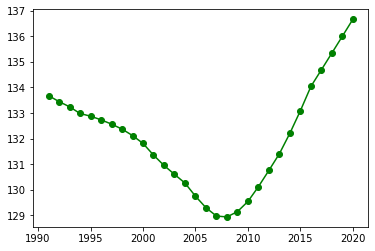

In [12]:
# A forest is defined in this dataset as "An area, incorporating all living and non-living components, that is dominated by trees having usually a single stem and a mature or potentially mature stand height exceeding two metres and with existing or potential crown cover of overstorey​ strata about equal to or greater than 20 per cent. This includes Australia's diverse native forests and commercial plantations, regardless of age. It is also sufficiently broad to encompass areas of trees that are sometimes described as woodlands".

Deforestation_path = "Resources/Deforestation.xlsx"
deforestation_data = pd.read_excel (Deforestation_path)

# deforestation_data

deforestation_years = deforestation_data["Year"]
deforestation_area = deforestation_data["Forest area (million hectares)"]

# plt.boxplot(deforestation_area) confirms no outliers

plt.plot(deforestation_years, deforestation_area, color="green", marker="o")

## Bushfires - Vanessa